
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [40]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

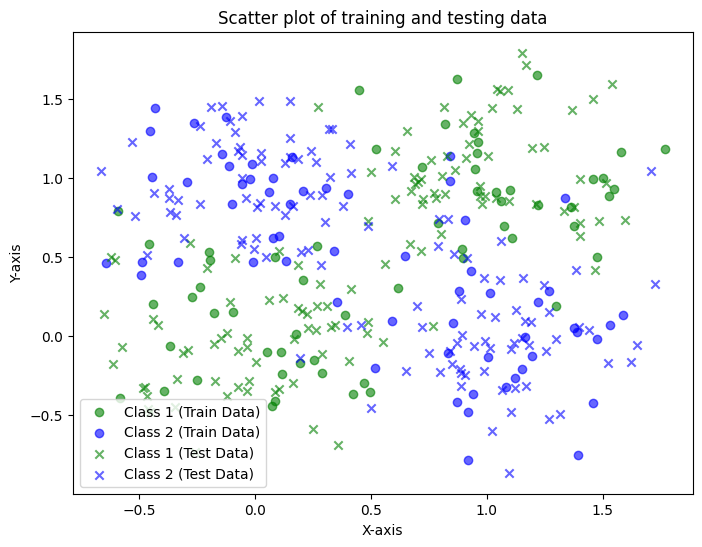

In [50]:
    ########################################
    #Part(a) #Synthetic data generation
    ########################################
    #Define means and covariances
mean1=(0,0)
mean2=(0,1)
mean3=(1,0)
mean4=(1,1)
cov = [[0.1, 0], [0, 0.1]]
size=90

    #Sample data points from the bivariate Gaussian distribution
    #You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample_data_1 = np.random.multivariate_normal(mean1, cov, size)
sample_data_2 = np.random.multivariate_normal(mean2, cov, size)
sample_data_3 = np.random.multivariate_normal(mean3, cov, size)
sample_data_4 = np.random.multivariate_normal(mean4, cov, size)

    #Labelling the data points
labels1 = np.full(size, 1)  # Class 1 label (+1)
labels4 = np.full(size, 1)  # Class 1 label (+1)
labels3 = np.full(size, -1) # Class 2 label (-1)
labels2 = np.full(size, -1) # Class 2 label (-1)

    #Generate training data
train1 = sample_data_1[:30]
train2 = sample_data_2[:30]
train3 = sample_data_3[:30]
train4 = sample_data_4[:30]
    # Combine training data
X_train = np.vstack((train1, train2, train3, train4))
Y_train = np.hstack((labels1[:30], labels2[:30], labels3[:30], labels4[:30]))
    

    #Generate testing data
test1 = sample_data_1[30:]
test2 = sample_data_2[30:]
test3 = sample_data_3[30:]
test4 = sample_data_4[30:]
    # Combine testing data
X_test = np.vstack((test1, test2, test3, test4))
Y_test = np.hstack((labels1[30:], labels2[30:], labels3[30:], labels4[30:]))



    # Plotting the training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='green', marker='o', alpha=0.6, label="Class 1 (Train Data)") #Verify and study syntax of scatter
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], color='blue', marker='o', alpha=0.6, label="Class 2 (Train Data)")
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', marker='x', alpha=0.6, label="Class 1 (Test Data)")
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', marker='x', alpha=0.6, label="Class 2 (Test Data)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Scatter plot of training and testing data")
plt.show()




KNN Accuracy: 87.92%


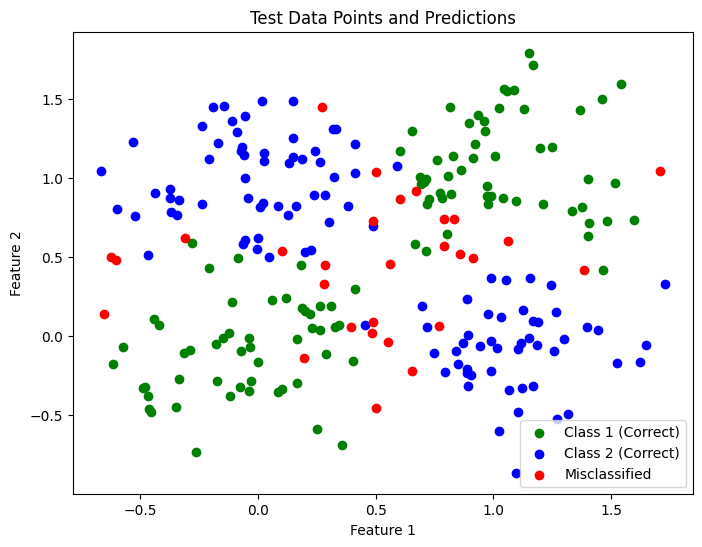

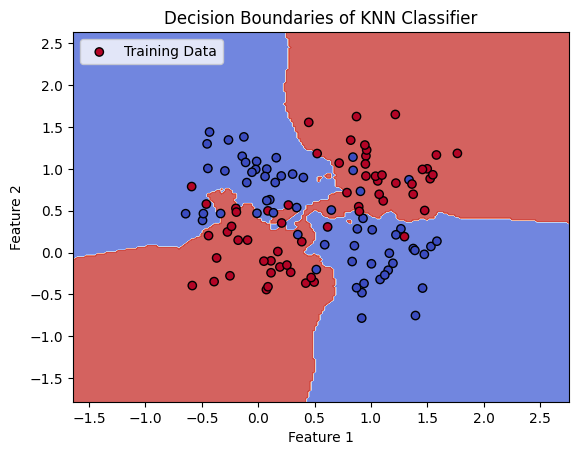

In [51]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors,distance_metric="l2"):
        #Remember to use 5 neighbors for the classifier
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = Y_train
    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        y_pred =[]
        for x in X_test:
            if self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == "l2":
                distances = np.linalg.norm(self.X_train - x, axis=1)
            else:
                raise ValueError("Unsupported distance metric. Use 'l1' or 'l2'.")
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.sign(np.sum(nearest_labels)))  # Majority vote
        return np.array(y_pred)


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    return np.mean(true == pred)
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = KNNAccuracy(Y_test, Y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")


#Create a visual representation of predictions



#Generate and visualize the decision regions and overlay the test points

def visualize_predictions(X_test, Y_test, Y_pred):
    # Classify correctly (Green: class 1, Blue: class -1) and misclassified points (Red)
    plt.figure(figsize=(8,6))
    
    # Correctly classified points
    correct_class_1 = (Y_test == Y_pred) & (Y_test == 1)
    correct_class_2 = (Y_test == Y_pred) & (Y_test == -1)
    
    # Misclassified points
    misclassified = Y_test != Y_pred
    
    # Plot points
    plt.scatter(X_test[correct_class_1, 0], X_test[correct_class_1, 1], color='green', label='Class 1 (Correct)')
    plt.scatter(X_test[correct_class_2, 0], X_test[correct_class_2, 1], color='blue', label='Class 2 (Correct)')
    plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1], color='red', label='Misclassified')
    
    plt.title("Test Data Points and Predictions")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Visualizing the Decision Boundaries
def visualize_decision_boundaries(X_train, y_train, model, resolution=0.02):
    # Set up a grid over the input space
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    
    # Predict the class for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Scatter plot of training data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label="Training Data")
    
    plt.title("Decision Boundaries of KNN Classifier")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="upper left")
    plt.show()

visualize_predictions(X_test, Y_test, Y_pred)

# Visualize decision boundaries
visualize_decision_boundaries(X_train, Y_train, knn)

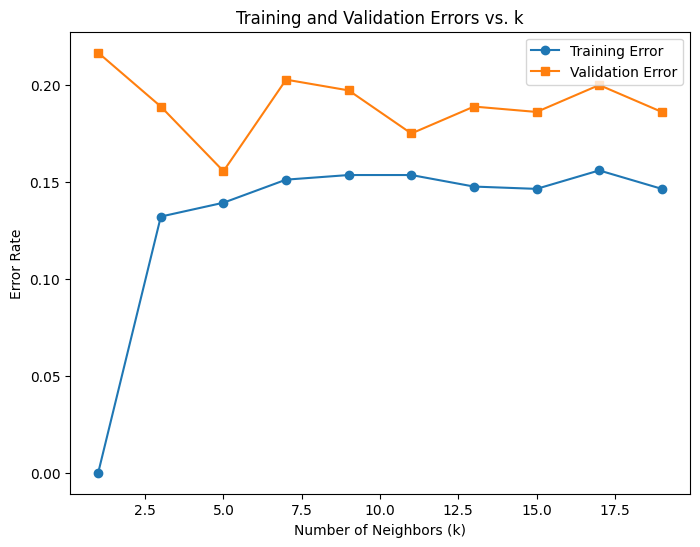

Least validation error k value: 5


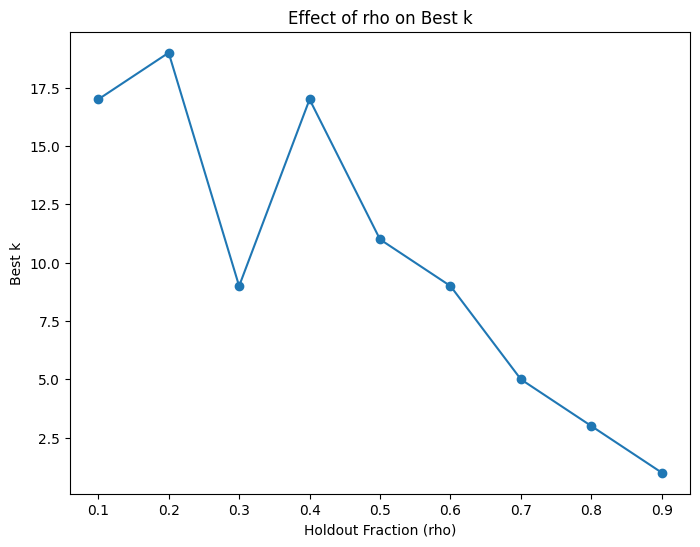

Test Accuracy with least validation error k (5): 87.92%


In [52]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
from sklearn.model_selection import train_test_split
def holdoutCVkNN(k_range, rho, X_train, Y_train):
    """
    Perform holdout cross-validation for k-NN.
    Inputs:
        k_range: Range of k values to evaluate.
        rho: Fraction of data to be held out for validation.
        X_train, Y_train: Full training dataset.
    Outputs:
        training_errors: Errors on training data.
        validation_errors: Errors on validation data.
    """
    training_errors = []
    validation_errors = []
    # Iterate through range of k values
    for k in k_range:
        # Iterate 10 times for each k value. Here n is 10. change it as per your convenience
        train_errors_k = []
        val_errors_k = []
        for _ in range(10):
            # Hold out rho fraction of training data in each repetition
            X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(
            X_train, Y_train, test_size=rho, random_state=None
        )        

            # Train k-NN classifier
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_sub, Y_train_sub)

            # Calculate errors on training and validation data
            train_error = 1 - KNNAccuracy(Y_train_sub, knn.predict(X_train_sub))
            val_error = 1 - KNNAccuracy(Y_val, knn.predict(X_val))

            # Append the errors for this iteration
            train_errors_k.append(train_error)
            val_errors_k.append(val_error)

        #Debug statement 
        #print(f"k={k}, rho={rho} -> Training Errors: {train_errors_k}, Validation Errors: {val_errors_k}")

        # Average the errors for the current k
        training_errors.append(np.mean(train_errors_k))
        validation_errors.append(np.mean(val_errors_k))

    return training_errors, validation_errors

# Define range of k values
k_values = range(1, 20, 2)  # Odd k values to prevent ties
rho = 0.3  # Fraction of training data held out for validation

# Compute training and validation errors
train_errors, val_errors = holdoutCVkNN(k_values, rho, X_train, Y_train)



#Plot training and validation errors for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.legend()
plt.title("Training and Validation Errors vs. k")
plt.show()

# Q1)What is the best value for k?
# A1) The best value for k is the one Obtained through graph. Note the best
# K has to be chosen based on a good tradeoff between validation and training errors, and not necessarily the on with the least validation error
best_k = k_values[np.argmin(val_errors)]
print(f"Least validation error k value: {best_k}")

# Q2)Effect of rho on k
# A2) We can evaluate the effect of the holdout fraction (rho) on the best k value by computing the best k value for different rho values.
rho_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7, 0.8, 0.9]
k_best_for_rho = []
for rho in rho_values:
    _, val_errors = holdoutCVkNN(k_values, rho, X_train, Y_train)
    k_best_for_rho.append(k_values[np.argmin(val_errors)])

# Plot effect of rho on least validation error k
plt.figure(figsize=(8, 6))
plt.plot(rho_values, k_best_for_rho, marker='o', linestyle='-')
plt.xlabel("Holdout Fraction (rho)")
plt.ylabel("Best k")
plt.title("Effect of rho on Best k")
plt.show()

# Evaluate the performance on test set with the best hyperparameters (i.e., best k)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)
Y_test_pred = best_knn.predict(X_test)
test_accuracy = KNNAccuracy(Y_test, Y_test_pred)
print(f"Test Accuracy with least validation error k ({best_k}): {test_accuracy * 100:.2f}%")

#5.Obtained through graph. Note the best K has to be chosen based on a good tradeoff between validation and training errors, and not necessarily the on with the least validation error
#6 Observed through graph. Here i checked for n=1 and 10, and i obtained a more stable result for n=10 to decide for the best k
#7 Yes, there is an overall improvement over (b) if we training and testing with the split method

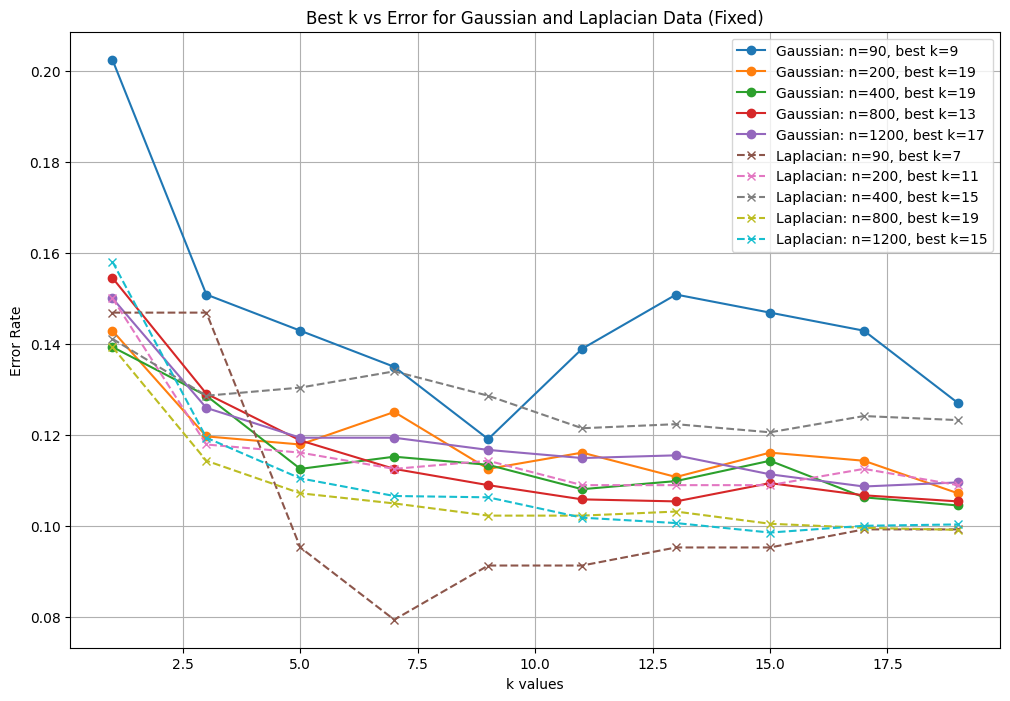

Gaussian Results:
For n=90: Best k=9, Best Error=0.1190
For n=200: Best k=19, Best Error=0.1071
For n=400: Best k=19, Best Error=0.1045
For n=800: Best k=13, Best Error=0.1054
For n=1200: Best k=17, Best Error=0.1086

Laplacian Results:
For n=90: Best k=7, Best Error=0.0794
For n=200: Best k=11, Best Error=0.1089
For n=400: Best k=15, Best Error=0.1205
For n=800: Best k=19, Best Error=0.0991
For n=1200: Best k=15, Best Error=0.0985


In [53]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
# Define the array of n values (samples per class)
# Define the array of n values (samples per class)
n_values = [90, 200, 400, 800, 1200]

# Define the range of k values to test
k_values = range(1, 20, 2)  

# Modified Function to generate synthetic data from Gaussian distribution which accepts n_points_per_class as input. X_train takes 30% of the data 
# and X_test takes 70% of the data. Y_train and Y_test are the corresponding labels
def generate_gaussian_data(n_points_per_class):
    means = [(0, 0), (0, 1), (1, 0), (1, 1)]
    cov = [[0.1, 0], [0, 0.1]]
    
    data_samples = [np.random.multivariate_normal(mean, cov, n_points_per_class) for mean in means]
    labels = []
    for i in range(4):
        if i in [0, 3]:  # Class 1 (+1)
            labels.append(np.full(n_points_per_class, 1))
        else:            # Class 2 (-1)
            labels.append(np.full(n_points_per_class, -1))
    
    X_train_new = np.vstack([d[:int(0.3 * n_points_per_class)] for d in data_samples])
    Y_train_new = np.hstack([l[:int(0.3 * n_points_per_class)] for l in labels])
    
    X_test_new = np.vstack([d[int(0.3 * n_points_per_class):] for d in data_samples])
    Y_test_new = np.hstack([l[int(0.3 * n_points_per_class):] for l in labels])
    
    return X_train_new, Y_train_new, X_test_new, Y_test_new



# Function to generate synthetic data from Laplacian distribution  which accepts n_points_per_class as input
def generate_laplacian_data(n_points_per_class):
    means = [(0, 0), (0, 1), (1, 0), (1, 1)]
    scale = np.sqrt(0.1 / 2)  # Match the variance of Gaussian distribution
    
    data_samples = []
    for mean in means:
        x = np.random.laplace(loc=mean[0], scale=scale, size=n_points_per_class)
        y = np.random.laplace(loc=mean[1], scale=scale, size=n_points_per_class)
        data_samples.append(np.column_stack((x, y)))
    
    labels = []
    for i in range(4):
        if i in [0, 3]:  # Class 1 (+1)
            labels.append(np.full(n_points_per_class, 1))
        else:            # Class 2 (-1)
            labels.append(np.full(n_points_per_class, -1))
    
    X_train_new = np.vstack([d[:int(0.3 * n_points_per_class)] for d in data_samples])
    Y_train_new = np.hstack([l[:int(0.3 * n_points_per_class)] for l in labels])
    
    X_test_new = np.vstack([d[int(0.3 * n_points_per_class):] for d in data_samples])
    Y_test_new = np.hstack([l[int(0.3 * n_points_per_class):] for l in labels])
    
    return X_train_new, Y_train_new, X_test_new, Y_test_new






#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian
# Evaluate best k and store error rates for Gaussian and Laplacian datasets
results_gaussian = {}
results_laplacian = {}
errors_gaussian = {}
errors_laplacian = {}

for dataset_type in ["gaussian", "laplacian"]:
    results = {}
    errors = {}
    
    for n in n_values:
        # Generate dataset once per n
        if dataset_type == "gaussian":
            X_train_new, Y_train_new, X_test_new, Y_test_new = generate_gaussian_data(n)
        elif dataset_type == "laplacian":
            X_train_new, Y_train_new, X_test_new, Y_test_new = generate_laplacian_data(n)
        
        errors_for_k = []
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_new, Y_train_new)
            Y_pred_new = knn.predict(X_test_new)
            error_rate = 1 - KNNAccuracy(Y_test_new, Y_pred_new)
            errors_for_k.append(error_rate)
        
        # Store errors for plotting later
        errors[n] = errors_for_k
        
        # Find best k
        best_k_index = np.argmin(errors_for_k)
        best_k = k_values[best_k_index]
        best_error = errors_for_k[best_k_index]
        
        results[n] = {'best_k': best_k, 'best_error': best_error}
    
    if dataset_type == "gaussian":
        results_gaussian = results
        errors_gaussian = errors
    elif dataset_type == "laplacian":
        results_laplacian = results
        errors_laplacian = errors

# Plotting (using stored errors)
plt.figure(figsize=(12, 8))

# Gaussian plot
for n in n_values:
    plt.plot(k_values,
             errors_gaussian[n],
             label=f'Gaussian: n={n}, best k={results_gaussian[n]["best_k"]}',
             marker='o')

# Laplacian plot
for n in n_values:
    plt.plot(k_values,
             errors_laplacian[n],
             label=f'Laplacian: n={n}, best k={results_laplacian[n]["best_k"]}',
             linestyle='--', marker='x')

plt.xlabel('k values')
plt.ylabel('Error Rate')
plt.title('Best k vs Error for Gaussian and Laplacian Data (Fixed)')
plt.legend()
plt.grid()
plt.show()

# Print the results
print("Gaussian Results:")
for n in results_gaussian:
    print(f"For n={n}: Best k={results_gaussian[n]['best_k']}, Best Error={results_gaussian[n]['best_error']:.4f}")

print("\nLaplacian Results:")
for n in results_laplacian:
    print(f"For n={n}: Best k={results_laplacian[n]['best_k']}, Best Error={results_laplacian[n]['best_error']:.4f}")

#I have not included any plots for the data sets, as there are many values of n for which i have to inlcude plots for both gaussian and laplacian data sets
#To change the norm, please go to (b) bit and manually change norm to l1 or l2 as per your convenience
#Observations
#1) We can see from the plot that the error rate decreases as the number of samples per class (n) increases and then stabilizes
#2) Based on my observations, the Laplcian-L1 performs slightly better than gaussian due to its more robust nature to outliers

L2 Accuracy: 87.92%


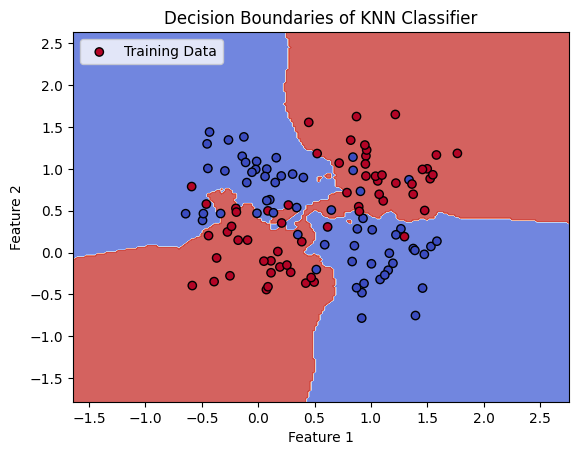

L1 Accuracy: 89.17%


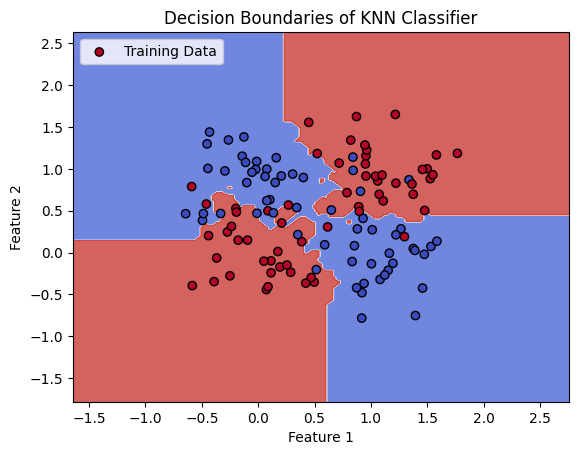

In [54]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric

#Understand the decision regions of KNN classifier with different distance metric

n_neighbors = 5

# Evaluate for l2 norm
knn_l2 = KNeighborsClassifier(n_neighbors=n_neighbors, distance_metric="l2")
knn_l2.fit(X_train, Y_train)
Y_pred_l2 = knn_l2.predict(X_test)
accuracy_l2 = KNNAccuracy(Y_test, Y_pred_l2)

# Visualize decision boundaries for l2
print(f"L2 Accuracy: {accuracy_l2 * 100:.2f}%")
visualize_decision_boundaries(X_train, Y_train, knn_l2)

# Evaluate for l1 norm
knn_l1 = KNeighborsClassifier(n_neighbors=n_neighbors, distance_metric="l1")
knn_l1.fit(X_train, Y_train)
Y_pred_l1 = knn_l1.predict(X_test)
accuracy_l1 = KNNAccuracy(Y_test, Y_pred_l1)

# Visualize decision boundaries for l1
print(f"L1 Accuracy: {accuracy_l1 * 100:.2f}%")
visualize_decision_boundaries(X_train, Y_train, knn_l1)



#It should be noted that i have used my 1st gaussain dataset for this part, and the l2 plot was already generated in the b bit, which is expected to
#be the same as the one generated here. The l1 plot is the new one generated here

#observations : The l1 norm is more robust to outliers as compared to l2 norm, as we can see from the plot that the decision boundaries are more linear
#The errors are pretty much consistent for both the norms as the data is well separated and the outliers are not affecting the decision boundaries much


Training set: 2400 samples
Validation set: 300 samples
Test set: 300 samples
Testing k values: [ 1  3  5  7  9 13 19 27 37 51 69 97]


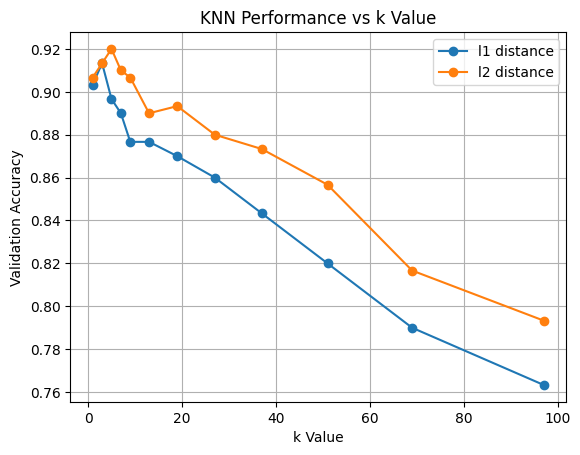


Optimal parameters: k=5, metric=l2
Best validation accuracy: 0.9200

Confusion Matrix (Rows: True Labels, Columns: Predicted Labels):
    0   1   2   3   4   5   6   7   8   9
0 | 31   0   1   0   0   0   0   0   0   1|
1 |  0  40   0   0   0   0   0   0   0   0|
2 |  0   0  28   0   0   0   0   0   1   0|
3 |  0   0   1  31   0   1   0   1   1   0|
4 |  0   1   0   0  23   0   0   0   0   1|
5 |  0   0   0   0   0  22   0   0   0   1|
6 |  0   0   0   0   0   0  25   0   0   0|
7 |  0   1   1   0   0   0   0  40   0   1|
8 |  0   5   0   2   0   4   0   1  15   0|
9 |  0   0   0   1   0   0   0   1   0  18|


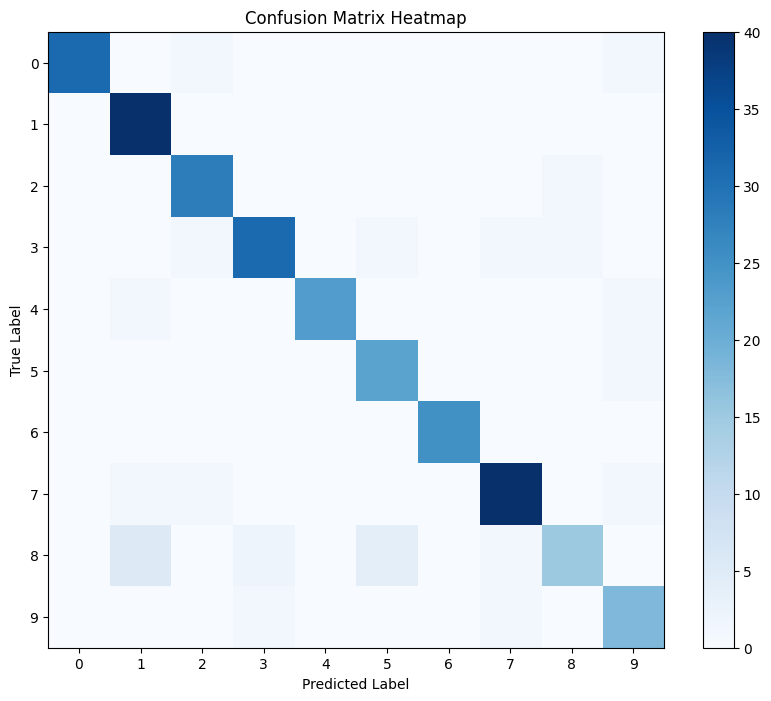

In [55]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from scipy import stats


mnist = fetch_openml('mnist_784', parser="auto")
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy().astype(int)

# Randomly sample images, my laptop cannot handle entire dataset without crashing, so im running over small sample size
subset_size = 3000
indices = np.random.choice(len(images), subset_size, replace=False)
images_subset = images[indices]
targets_subset = targets[indices]

# Plot sample images
'''plt.figure(figsize=(8,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images_subset[i].reshape(28,28), cmap='gray_r')
    plt.title(f"Label: {targets_subset[i]}")
plt.tight_layout()
plt.show()'''

#Create train, validation and test splits, i have given split ratio is 80-10-10 . Note that the second split is for validation and test split
X_train, X_temp, y_train, y_temp = train_test_split(
    images_subset, targets_subset, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

#print sizes of the split set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

#Write 'MultiClassKNNClassify' function
#Very similar to what i had written earlier with minor changes mentioned later on
class MultiClassKNN:
    def __init__(self, n_neighbors=5, distance_metric='l2'):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculate distances
            if self.distance_metric == 'l2':
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance_metric == 'l1':
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            else:
                raise ValueError("Invalid distance metric. Use 'l1' or 'l2'")
            
            # Get k nearest neighbors, in eaelier knn used arg sort, but here we are using argpartition
            nearest_indices = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            
            # Majority vote with tie handling, used stats.mode to handle ties
            mode_result = stats.mode(nearest_labels, keepdims=True)
            predictions.append(mode_result.mode[0])
        return np.array(predictions)



#Create a confusion matrix for test data
def compute_confusion_matrix(true_labels, pred_labels):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels
    num_classes = len(np.unique(true_labels))
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for true, pred in zip(true_labels, pred_labels):
        matrix[true, pred] += 1
        
    return matrix


# Hyperparameter tuning with dynamic k-range, log-spaced seems to be a good choice of spacing for k values
n_train = X_train.shape[0]
max_k = int(np.sqrt(n_train)) * 2  # Dynamic range based on sample size
k_values = np.unique(np.logspace(0, np.log10(max_k), num=15).astype(int))  # Logarithmic spacing

# Ensure odd numbers to avoid ties in majority voting
k_values = [k if k%2 else k+1 for k in k_values]
k_values = np.unique([max(1, k) for k in k_values])  # Remove duplicates and ensure k >= 1

print(f"Testing k values: {k_values}")

#initially setting the best parameters to l2 and k=3 and later the code will update the best parameters
best_params = {'k': 3, 'metric': 'l2'}
best_acc = 0
accuracies = []

for metric in ['l1', 'l2']:
    metric_acc = []
    for k in k_values:
        knn = MultiClassKNN(n_neighbors=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        val_pred = knn.predict(X_val)
        acc = np.mean(val_pred == y_val)
        metric_acc.append(acc)
        
        if acc > best_acc:
            best_acc = acc
            best_params['k'] = k
            best_params['metric'] = metric
    
    accuracies.append(metric_acc)
    plt.plot(k_values, metric_acc, marker='o', label=f'{metric} distance')

plt.xlabel('k Value')
plt.ylabel('Validation Accuracy')
plt.title('KNN Performance vs k Value')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nOptimal parameters: k={best_params['k']}, metric={best_params['metric']}")
print(f"Best validation accuracy: {best_acc:.4f}")


#final evaluation, mainly to check the performance on test data thorugh confusion matrix
final_knn = MultiClassKNN(n_neighbors=best_params['k'], 
                         distance_metric=best_params['metric'])
final_knn.fit(np.vstack([X_train, X_val]), 
             np.concatenate([y_train, y_val]))
test_pred = final_knn.predict(X_test)

#print the confusion matrix
conf_matrix = compute_confusion_matrix(y_test, test_pred)
print("\nConfusion Matrix (Rows: True Labels, Columns: Predicted Labels):")
print("    0   1   2   3   4   5   6   7   8   9")  # Column headers
for i in range(10):
    row = [f"{conf_matrix[i,j]:3d}" for j in range(10)]
    print(f"{i} |{' '.join(row)}|")  # Row labels


plt.figure(figsize=(10,8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Suggest an alternative ways to improve performance
# We can normalize pixel values to [0,1] range
# We can reduce the dimensios of the data by using dimentionality reduction techniques like PCA
# We can use weighted KNN by using the inverse distance concept as taught in the class. Also there is a cos metric which can be used, which is a good metric for text data
# Add rotated/translated digit variations if we want to increase training data beyond what is given




<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution
A. The best performance i got from (B) bit after i ran 5 times was 88.75%. Note that this had default k = 5

2. Write down the best accuracy on MNIST validation and test data.
A. After running 3 times on a set of 3000 images, i got Optimal parameters: k=1, metric=l2
and the corresponding best validation accuracy: 0.94

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
A. There are some interesting observations that i made. Most of the errors Happened with 4 or 9 and one can reasonable say this that if a
person writes the slant line in 4 a bit looped, then the classifier might incorrectly mislabel it as 9 and vie versa. Also 2 with 7 and 8 was also an error hotspot. Some more common hotspots include 3 with 5, 5 with 8, 5 with 6, 7 with 9 as well. This is very well visualized by the confusion heatmap i have included.
